# Day 10 | Second week task

As an example of SVM and PCA in action, you will solve the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3,000 pixels each. (pixels are features)
A fetcher for the dataset is built into Scikit-Learn:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.decomposition import PCA as RandomizedPCA #new
from sklearn.model_selection import train_test_split #new
from sklearn.model_selection import GridSearchCV #new
from PIL import Image, ImageDraw

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)
print(faces.target)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)
[1 3 3 ... 7 3 5]


1. Try to plot the faces from *faces.images* matrix and faces.target_names as labels. TIP: use **subplots** and **imshow** functions from matplotlib. 

2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (**rbf**) and number of PCA components (try **50** and **150**). Compare supervised with unsupervised. 

3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use **training_test_split function** from _sklearn.cross_validation_

4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use **GridSearchCV** from _sklearn.grid_search_, use following values for 'svn__c': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters. 

5. Print best parameters from grid search. If The optimal values fall  fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

6. Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use **predict** function  

7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).



## 1. Try to plot the faces from *faces.images* matrix and faces.target_names as labels. TIP: use **subplots** and **imshow** functions from matplotlib. 

Let's plot a few of these faces to see what we're working with:

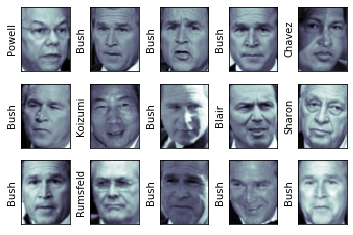

In [2]:
fig, ax = plotter.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")


Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis  to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline using make_pipeline function

## 2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (**rbf**) and number of PCA components (try **50** and **150**). 

In [3]:

pca_model_50 = make_pipeline(RandomizedPCA(n_components= 50, svd_solver='randomized', whiten=True), SVC(kernel='rbf'))

pca_model_150 = make_pipeline(RandomizedPCA(n_components= 150, svd_solver='randomized', whiten=True), SVC(kernel='rbf'))

pca_model = make_pipeline(RandomizedPCA(svd_solver='randomized', whiten=True), SVC(kernel='rbf'))


## 3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use training_test_split function from sklearn.cross_validation

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,random_state=0)

## 4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use GridSearchCV from _sklearn.grid_search_, use following values for 'svn__c': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters.

In [5]:
from sklearn.model_selection import GridSearchCV
parameters = {'svc__C':[1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001 , 0.005]}
parameters2 = {'svc__C':[1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001 , 0.005], 'pca__n_components':[50,100,150,200]}


grid_search_50 = GridSearchCV(pca_model_50, parameters)
grid_search_50.fit(X_train, y_train)

grid_search_150 = GridSearchCV(pca_model_150, parameters)
grid_search_150.fit(X_train, y_train)


#which number of components is better?
grid_search = GridSearchCV(pca_model, parameters2)
grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='randomized', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                  

In [6]:
print("\nPCA 50\nBest parameters: {}".format(grid_search_50.best_params_))
print("\nPCA 150\nBest parameters: {}".format(grid_search_150.best_params_))
print("\nPCA \nBest parameters: {}".format(grid_search.best_params_))


PCA 50
Best parameters: {'svc__C': 5, 'svc__gamma': 0.005}

PCA 150
Best parameters: {'svc__C': 10, 'svc__gamma': 0.005}

PCA 
Best parameters: {'pca__n_components': 100, 'svc__C': 5, 'svc__gamma': 0.005}


## 6. Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use predict function

In [7]:
pca_50 = grid_search_50.best_estimator_
y_pred50 = pca_50.predict(X_test)

In [8]:
pca_150 = grid_search_150.best_estimator_
y_pred150 = pca_150.predict(X_test)

In [9]:
pca = grid_search.best_estimator_
y_pred = pca.predict(X_test)

## 7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).

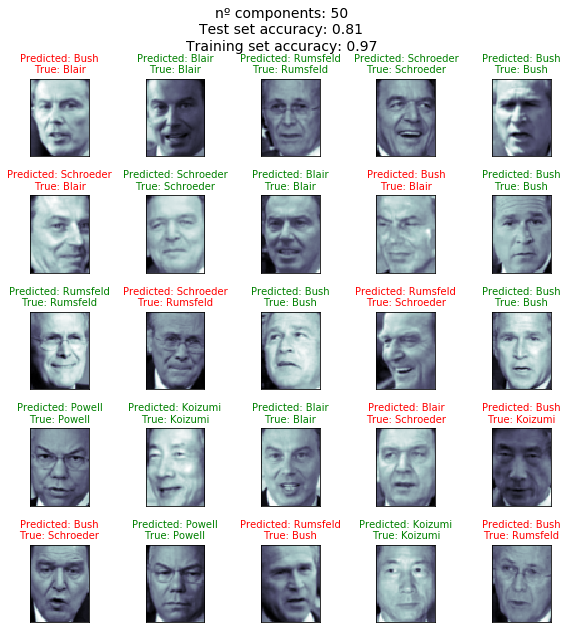

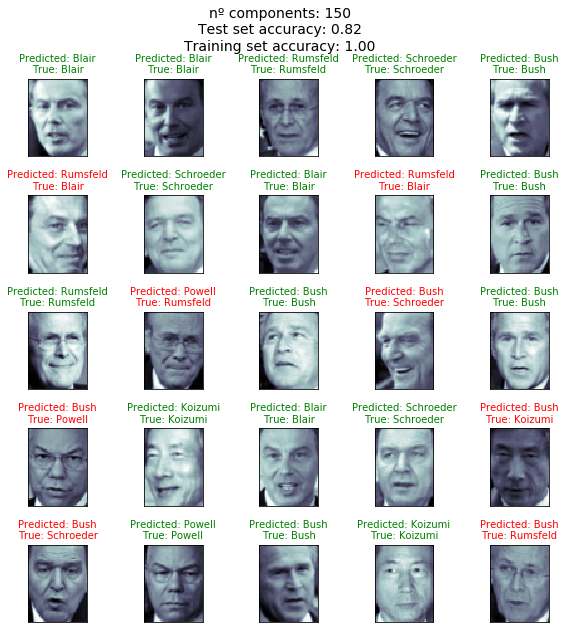

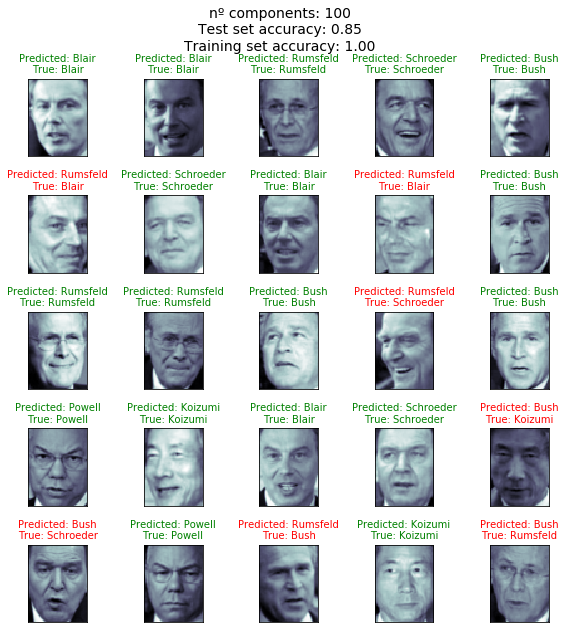

In [10]:
def check_accuracy(prediction, model,n):
    """
    predicion: predicted values
    model: model you want to use
    n: int, nº of components
    """
    fig, ax = plotter.subplots(5, 5, figsize=(10,10), gridspec_kw={'hspace':0.5})
    for i, axi in enumerate(ax.flat):
        axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_title('Predicted: ' + faces.target_names[prediction[i]].split()[-1] + '\nTrue: ' + faces.target_names[y_test[i]].split()[-1] , size=10, color='green' if prediction[i] == y_test[i] else 'red')
    fig.suptitle("nº components: {}\n".format(n) +"Test set accuracy: {:.2f}".format(model.score(X_test, y_test)) + "\nTraining set accuracy: {:.2f}\n".format(model.score(X_train, y_train)), size=14)

check_accuracy(y_pred50, pca_50, 50)

check_accuracy(y_pred150, pca_150,150)

#best nº components
check_accuracy(y_pred, pca, 100)

## Is George Bush in the Photo? 

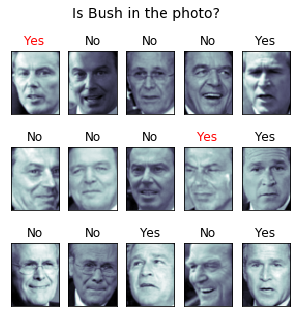

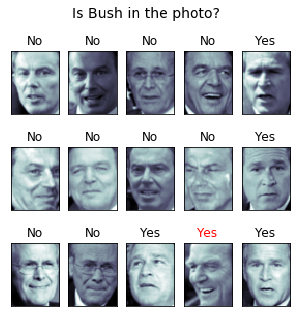

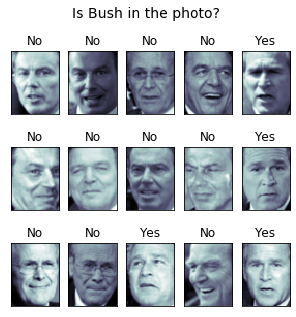

In [11]:
def search_person (name, prediction, num):
    """
    name: str, name of person.
    num: int, name position in faces.target_names. 
    """
    fig, ax = plotter.subplots(3, 5,figsize=(5,5))
    for i, axi in enumerate(ax.flat):
        axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_title('Yes' if prediction[i] == num else 'No', color='red' if( prediction[i] == num  and y_test[i] != num) or (prediction[i] != num  and y_test[i] == num) else 'black')
        fig.suptitle('Is {} in the photo?'.format(name), size=14);

search_person('Bush', y_pred50, 3)
search_person('Bush', y_pred150, 3)
search_person('Bush', y_pred, 3)


In [12]:
from sklearn.metrics import classification_report
def get_classification_report(prediction):
    print (classification_report(y_test, prediction,
                                target_names=faces.target_names))

get_classification_report(y_pred50)
get_classification_report(y_pred150)
get_classification_report(y_pred)

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.75      0.80        16
     Colin Powell       0.83      0.93      0.88        61
  Donald Rumsfeld       0.76      0.74      0.75        35
    George W Bush       0.83      0.93      0.88       125
Gerhard Schroeder       0.58      0.48      0.53        29
      Hugo Chavez       0.87      0.68      0.76        19
Junichiro Koizumi       0.93      0.76      0.84        17
       Tony Blair       0.85      0.66      0.74        35

         accuracy                           0.81       337
        macro avg       0.81      0.74      0.77       337
     weighted avg       0.81      0.81      0.81       337

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.62      0.74        16
     Colin Powell       0.82      0.84      0.83        61
  Donald Rumsfeld       0.80      0.69      0.74        35
    George W Bush       0.77      0.97      0.86    